# Part 1: Generate Linearly Separable Data

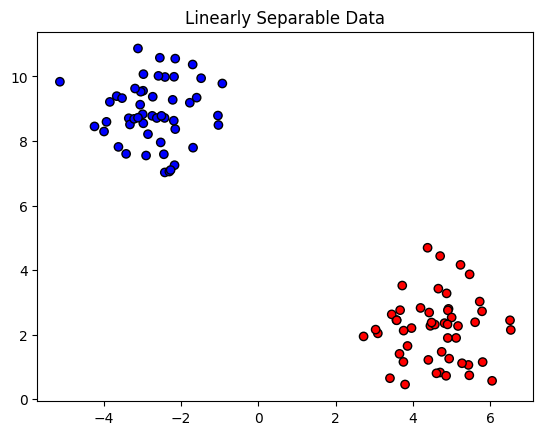

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)
y = np.where(y == 0, -1, 1)
# Convert labels from {0, 1} to {-1, 1}
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title('Linearly Separable Data')
plt.show()

# Part 2: Hard Margin SVM

In [3]:
from sklearn.svm import SVC

svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X, y)

print("Number of support vectors:", len(svm_hard.support_))

Number of support vectors: 2


In [4]:
w = svm_hard.coef_[0]  # weight vector
b = svm_hard.intercept_[0]

print("w:", w)
print("b:", b)

w: [ 0.24748994 -0.17407192]
b: 0.7341550476191021


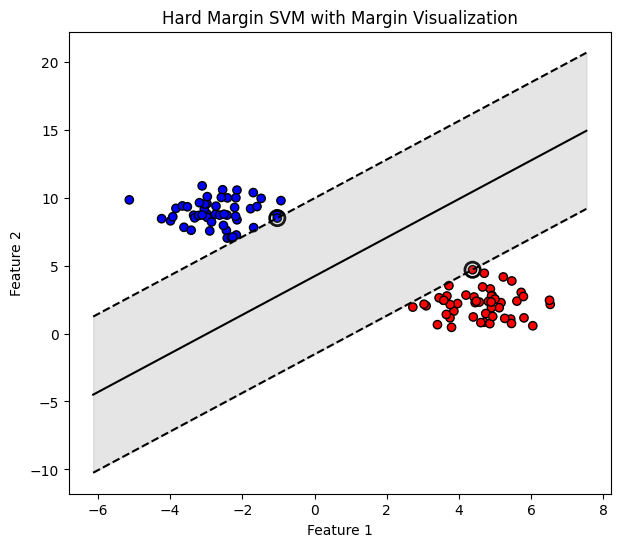

In [5]:
plt.figure(figsize=(7, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:, 0],
    svm_hard.support_vectors_[:, 1],
    s=120,
    facecolors='none',
    edgecolors='k', linewidth = 2,
    label='Support Vectors'
)

# Create x values for line plotting
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w[0] * x_vals + b) / w[1]

# Decision boundary: w.x + b = +-1
y_margin_pos = -(w[0] * x_vals + b - 1) / w[1]
y_margin_neg = -(w[0] * x_vals + b + 1) / w[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_margin_pos, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_neg, 'k--', label='Margin -1')

# Shade margin area
plt.fill_between(x_vals, y_margin_pos, y_margin_neg, 
                 color='gray', alpha=0.2, label='Margin Area')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM with Margin Visualization')
plt.show()

# Part 3: Hard Margin on Overlapping Data

<function matplotlib.pyplot.show(close=None, block=None)>

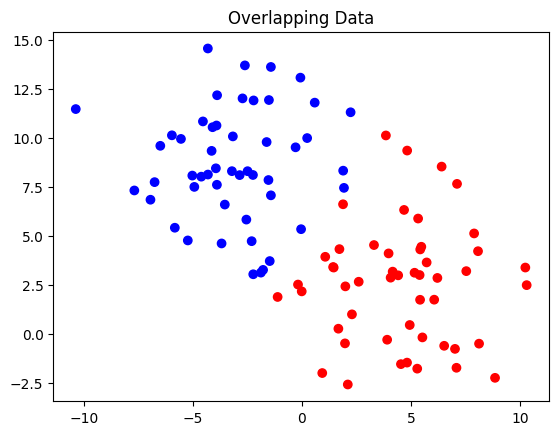

In [6]:
X_overlap, y_overlap = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=3)
y_overlap= np.where(y_overlap == 0, -1,1)
 
plt.scatter(X_overlap[:,0], X_overlap[:,1], c=y_overlap, cmap='bwr')
plt.title('Overlapping Data')
plt.show

In [7]:
from sklearn.svm import SVC

# Hard Margin SVM (C very large)
svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X_overlap, y_overlap)

print("Number of support vectors (overlapping data):", 
      len(svm_hard.support_))

Number of support vectors (overlapping data): 3


In [9]:
w = svm_hard.coef_[0]  # Weight vector
b = svm_hard.intercept_[0] # Bias
print("w (overlapping data):", w)
print("b (overlapping data):", b)

w (overlapping data): [ 6.42872096 -3.87151047]
b (overlapping data): 15.50812556660477


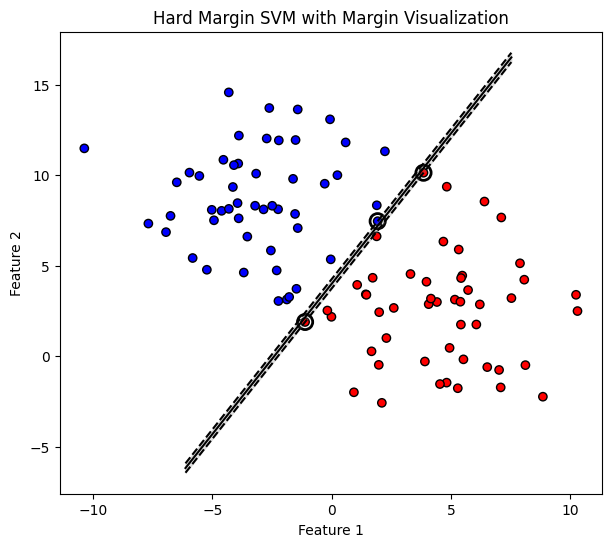

In [10]:
plt.figure(figsize=(7, 6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:, 0],
    svm_hard.support_vectors_[:, 1],
    s=120,
    facecolors='none',
    edgecolors='k', linewidth = 2,
    label='Support Vectors'
)

# Create x values for line plotting
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w[0] * x_vals + b) / w[1]

# Decision boundary: w.x + b = +-1
y_margin_pos = -(w[0] * x_vals + b - 1) / w[1]
y_margin_neg = -(w[0] * x_vals + b + 1) / w[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_margin_pos, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_neg, 'k--', label='Margin -1')

# Shade margin area
plt.fill_between(x_vals, y_margin_pos, y_margin_neg, 
                 color='gray', alpha=0.2, label='Margin Area')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM with Margin Visualization')
plt.show()

# Part 4: Soft Margin on overlapping data

In [11]:
from sklearn.svm import SVC
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X_overlap, y_overlap)
print("Number of support vectors (soft margin):", 
      len(svm_soft.support_))

Number of support vectors (soft margin): 6


In [12]:
w = svm_soft.coef_[0]  # Weight vector
b = svm_soft.intercept_[0] # Bias
print("w (overlapping data):", w)
print("b (overlapping data):", b)

w (overlapping data): [ 1.52813477 -1.02288623]
b (overlapping data): 4.643029356001453


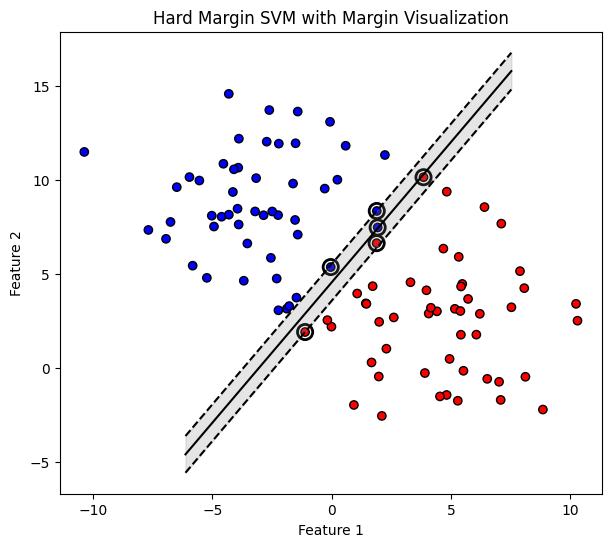

In [13]:
plt.figure(figsize=(7, 6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_soft.support_vectors_[:, 0],
    svm_soft.support_vectors_[:, 1],
    s=120,
    facecolors='none',
    edgecolors='k', linewidth = 2,
    label='Support Vectors'
)

# Create x values for line plotting
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w[0] * x_vals + b) / w[1]

# Decision boundary: w.x + b = +-1
y_margin_pos = -(w[0] * x_vals + b - 1) / w[1]
y_margin_neg = -(w[0] * x_vals + b + 1) / w[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_margin_pos, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_neg, 'k--', label='Margin -1')

# Shade margin area
plt.fill_between(x_vals, y_margin_pos, y_margin_neg, 
                 color='gray', alpha=0.2, label='Margin Area')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM with Margin Visualization')
plt.show()